## Milestone 4 Project

# Author - Shuyang Ren

- update Milestones 1 through 3, and assignment 9 based on feedback;
- enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);
- explain your choice of model and model accuracy; and
- draw direct inferences and conclusions from model results (Describe how your model results can improve or provide a solution to the problem you have chosen). Use graph and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.

For this assignment I will be using the housing data set that was introduced as part of this course.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"

In [25]:
# Importing nessessary files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import statsmodels.graphics.tsaplots as splt
import sklearn.linear_model as lm
import sklearn as sk
import statsmodels.api as sm

In [3]:
Housing = pd.read_csv(fileName)
Housing.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# Check for data types
Housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
Housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Some data preperation for the date column
for i in range(0, len(Housing) - 1):
    Housing.loc[i,'datetime'] = dt.datetime.strptime(str(Housing.loc[i,'date'])[0:8],"%Y%m%d")

Housing['year'] = Housing['date'].astype(str).str[0:4]
Housing['month'] = Housing['date'].astype(str).str[4:6]
Housing['day'] = Housing['date'].astype(str).str[6:8]
Housing.sort_values(['year','month', 'day'], ascending = (True, True, True))

for col in ["year", "month", "day"]:
    Housing[col] = Housing[col].astype(int)

Housing = Housing.drop('id', axis = 1)
Housing = Housing.drop('date', axis = 1)
Housing = Housing.drop('lat', axis = 1)
Housing = Housing.drop('long', axis = 1)

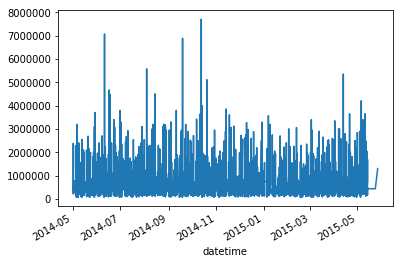

In [7]:
# Making time series plot
Price_series = pd.Series(data = Housing['price'])
Price_series.index= Housing['datetime']
Price_series.plot()

From our previous experience with this data set, we know that the price of houses is not normally distributed and is strongly skewed right. Price of houses is highly correlated with its size, which is determined by square fottage area but also by features such as number of bedrooms and bathrooms. Those features will be our focus for this assignment.

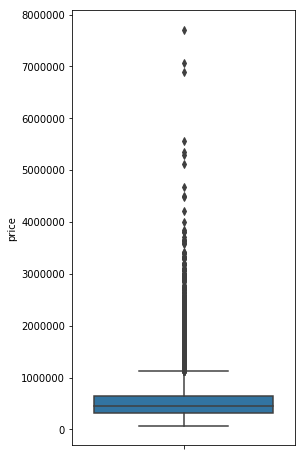

In [8]:
# Box and whisker plot for price
ax = plt.figure(figsize=(4, 8)).gca()
sns.boxplot(x = 'price', data = Housing, orient = "v")

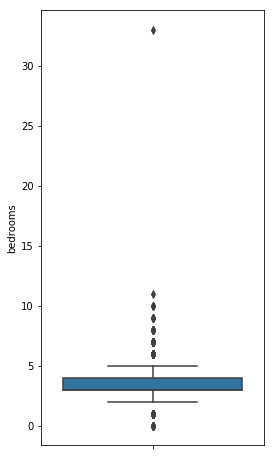

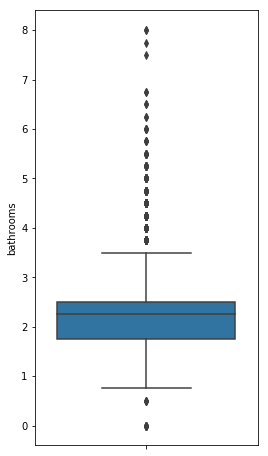

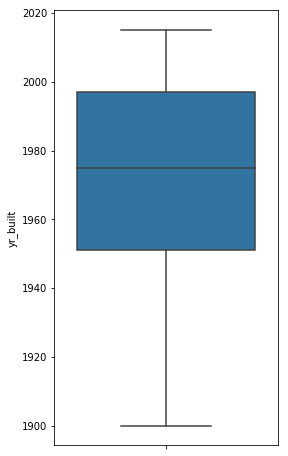

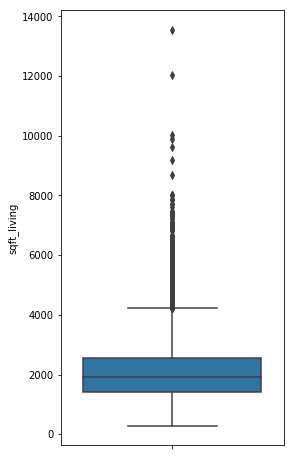

In [9]:
# (Above) Distribution would be skewed right and not normal
# Repeat for bedrooms, bathrooms, year built, and sqft living
for col in ["bedrooms", "bathrooms", "yr_built", "sqft_living"]:
    ax = plt.figure(figsize=(4, 8)).gca()
    sns.boxplot(x = col, data = Housing, orient = "v")

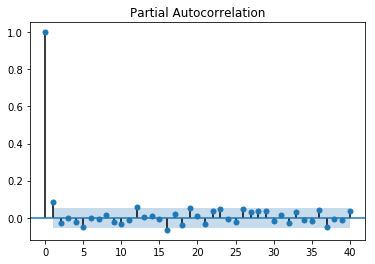

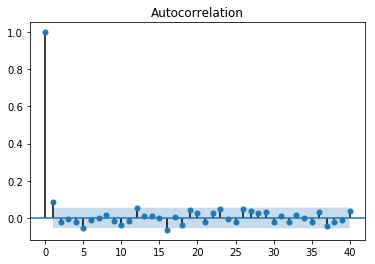

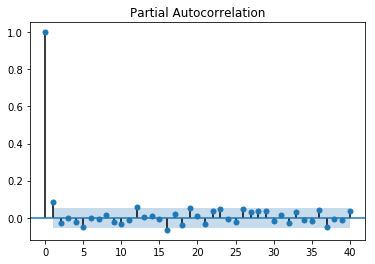

In [10]:
# Testing stationality using data collected from describe
Median_house = Housing.query('bedrooms == 3')
Median_house = Median_house.query('bathrooms == 1.75')
Median_house = Median_house.query('waterfront == 0')
Median_house = Median_house.query('sqft_living >= 1427')
Median_house = Median_house.query('sqft_living <= 2550')

Median_series = pd.Series(data = Median_house['price'])
Median_series.index = Median_house['datetime']
splt.plot_acf(Median_series, lags = 40)
splt.plot_pacf(Median_series, lags = 40)

The mean of the bootstrapped sampling for waterfront housing price:  1664457.7042699414
The 95% confidence interval:  357645.0 to  4467499.999999993
The mean of the bootstrapped sampling for non-waterfront housing price:  531562.747451329
The 95% confidence interval:  185000.0 to  1400000.0


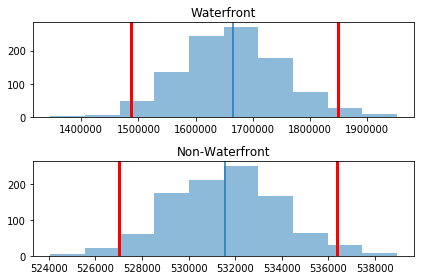

In [12]:
# Testing if waterfront vs non-waterfront houses' distribution are really different
n_replicas = 1000

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    
waterfront = Housing.query('waterfront == 1')
not_waterfront = Housing.query('waterfront == 0')

waterfront_price = waterfront['price']
waterfront_price_bootstrap_means = pd.Series([
    waterfront_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
not_waterfront_price = not_waterfront['price']
not_waterfront_price_bootstrap_means = pd.Series([
    not_waterfront_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

plot_dists(waterfront_price_bootstrap_means, not_waterfront_price_bootstrap_means, 
           nbins=80, a_label='Waterfront', b_label='Non-Waterfront')
p = 5

print("The mean of the bootstrapped sampling for waterfront housing price: " , np.mean(waterfront_price_bootstrap_means)) 
print("The 95% confidence interval: ", np.percentile(waterfront_price, p/2.), "to ", np.percentile(waterfront_price, 100-p/2.))
print("The mean of the bootstrapped sampling for non-waterfront housing price: " , np.mean(not_waterfront_price_bootstrap_means))
print("The 95% confidence interval: ", np.percentile(not_waterfront_price, p/2.), "to ", np.percentile(not_waterfront_price, 100-p/2.))

In [20]:
# Linear regression
price_lo = np.min(Housing['price'])
price_hi = np.mean(Housing['price']) + 2*np.std(Housing['price'])
price_max = np.max(Housing['price'])
price_mean = np.mean(Housing['price'])
price_min = int(price_mean)
Housing['price_normed'] = (Housing['price'] - price_mean)/(price_max - price_min)
maxfoot = np.max(Housing['sqft_living'])
minfoot = np.min(Housing['sqft_living'])
meanfoot = np.mean(Housing['sqft_living'])
Housing['normed_living'] = (Housing['sqft_living']- meanfoot)/(maxfoot - minfoot)
Housing['2015year']= (Housing['year'] == 2015).astype(int)
Housing['renovated']= (Housing['yr_renovated'] != 0).astype(int)
Housing['age']= Housing['year']- Housing['yr_built']

Try1 = Housing.query('price > 75000')
Try2 = Try1.query('price < 1274000')
##print(Try2.head())
Housing_beds = Try2.query('bedrooms < 10')
Housing_bnb = Housing_beds.query('bathrooms < 4')
Training1 = Housing_bnb.query('year == 2014')
Training2 = Housing_bnb.query('year == 2015')
Training3 = Training2.query('month < 3')
Test = Training2.query('month >= 3')
Training = Training1.append(Training3)
print((Test.head()))
print(len(Training2))
print(len(Training3))
print(len(Training))

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
8   229500.0         3        1.0         1780      7470     1.0           0   
9   323000.0         3        2.5         1890      6560     2.0           0   
10  662500.0         3        2.5         3560      9796     1.0           0   
14  530000.0         5        2.0         1810      4850     1.5           0   
19  230000.0         3        1.0         1250      9774     1.0           0   

    view  condition  grade      ...       sqft_lot15   datetime  year  month  \
8      0          3      7      ...             8113 2015-04-15  2015      4   
9      0          3      7      ...             7570 2015-03-12  2015      3   
10     0          3      8      ...             8925 2015-04-03  2015      4   
14     0          3      7      ...             4850 2015-03-12  2015      3   
19     0          4      7      ...             8850 2015-04-24  2015      4   

    day  normed_living  2015year renov

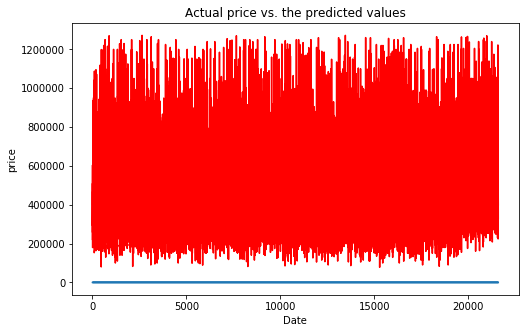

In [24]:
X = Training[['year', 'month', 'day','bedrooms','bathrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age']]
Y = Training['price_normed']
lm_mod = lm.LinearRegression(fit_intercept = True)
mod_fit = lm_mod.fit(X, Y)
Training['scores'] = mod_fit.predict(X)
Training['resids'] = Training['scores'] - Training['price_normed']

def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(Training, 'price')  

In [28]:
# (Above) I am not sure what went wrong, but I will move onto multi-regression

X = Training[['month', 'day','bedrooms','bathrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age']]
statmod = sm.OLS(Y,X)
res = statmod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_normed   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1793.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        21:46:47   Log-Likelihood:                 38517.
No. Observations:               16038   AIC:                        -7.701e+04
Df Residuals:                   16028   BIC:                        -7.694e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
month            -0.0006   5.57e-05    -11.011      0.000      -0.001      -0.001
day              -0.0002   2.02e-05    -11.217      0.000      -0.000      -0.000
bedrooms         -0.0085      0.000    -36.298      0.000      -0.009      -0.008
bathrooms         0.0001      0.000      0.265      0.791      -0.001       0.001
waterfront        0.0118      0.003      3.872      0.000       0.006       0.018
view              0.0045      0.000     15.694      0.000       0.004       0.005
grade             0.0030      0.000     21.721      0.000       0.003       0.003
renovated         0.0042      0.001      4.533      0.000       0.002       0.006
normed_living     0.3947      0.004    103.738      0.000       0.387       0.402
age               0.0002   6.97e-06     24.711      0.000       0.000       0.000
==============================================================================
Omnibus:                      933.288   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.912
Skew:                           0.523   Prob(JB):                    1.09e-286
Kurtosis:                       3.936   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Followed by limiting certain parameteres
X = Training[['month', 'day','bedrooms', 'waterfront', 'view', 'grade',
                 'renovated', 'normed_living','age','zipcode']]
statmod = sm.OLS(Y,X)
res = statmod.fit()
Training['scores'] = res.predict(X)
Training['resids'] = Training['scores'] - Training['price_normed']
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_normed   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2535.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        21:46:53   Log-Likelihood:                 40102.
No. Observations:               16038   AIC:                        -8.018e+04
Df Residuals:                   16028   BIC:                        -8.011e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
month         -3.373e-05   5.14e-05     -0.657      0.511      -0.000    6.69e-05
day           -4.735e-05   1.85e-05     -2.558      0.011   -8.36e-05   -1.11e-05
bedrooms         -0.0022      0.000     -9.602      0.000      -0.003      -0.002
waterfront        0.0171      0.003      6.200      0.000       0.012       0.023
view              0.0040      0.000     15.455      0.000       0.003       0.004
grade             0.0154      0.000     66.519      0.000       0.015       0.016
renovated         0.0025      0.001      2.967      0.003       0.001       0.004
normed_living     0.2065      0.005     44.966      0.000       0.197       0.215
age               0.0003   6.39e-06     50.391      0.000       0.000       0.000
zipcode        -1.32e-06   2.23e-08    -59.176      0.000   -1.36e-06   -1.28e-06
==============================================================================
Omnibus:                      965.220   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1578.907
Skew:                           0.487   Prob(JB):                         0.00
Kurtosis:                       4.189   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


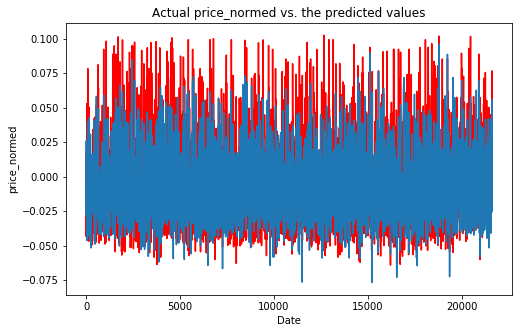

In [32]:
# Compare to actual data
X = Test[['month', 'day','bedrooms', 'waterfront', 'view', 'grade', 'renovated', 'normed_living','age', 'zipcode']]
Test['scores'] = res.predict(X)
Test['resids'] = Test['scores'] - Test['price_normed']
plot_mod_fit(Test, 'price_normed')  

# Conclusion

We were able to conclude that the time series is stationary (not-moving) and there is a significant difference in the distribution of prices among waterfront houses vs non-waterfront houses. We then generated a model to forecast prices based on features such as square footage and number of bedrooms.